In [46]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Implementating Perceptron Algorithm in Python

In [2]:
class Perceptron:
    """Perceptron classifier
    
    Parameters
    ------------
    eta: float
      Learning rate(0.0 and 1.0)
    n_iter : int 
      Passes over the training dataset | number of epochs
    random_state : int
      Random number generator seed for random weight 
      initialization
      
      
    Attributes
    ------------
    w_ : 1d-array
      Weights after fitting
    b_ : Scalar
      Bias unit after fitting
      
    errors_ : list
      Number of misclassifications (updates) in each epoch
    
    """
    
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    
    def fit(self, X, y):
        """Fit training data.
        
        Parameters
        ------------        
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of 
          examples and n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.
          
          
        Returns
        ------------        
        self : object
            
        """
        
        rgen = np.random.RandomState(self.random_state)

        # Setting weights(randomize) and bias(zero)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float(0.)
        
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0 
            for xi, target in zip(X, y):

                # Note yhat is updated simonetenlouly, meaning this is calculated after the weights and bias
                # deltaW = n(y - yhat)
                update = self.eta * (target - self.predict(xi)) 
                
                # deltaW = n(y - yhat)xi
                self.w_ += update * xi
                
                self.b_ += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
                
    def net_input(self, X):
        """Calculate net input"""
        # Z = W^tx + b
        return np.dot(X, self.w_) + self.b_

    def predict(self, X):
        """Return class label after unit step"""
        #This is the classification step
        return np.where(self.net_input(X) >= 0.0, 1, 0)

## Testing Perceptron Algorithm on Iris
In this section I will apply the above perception implementation above to classify two classes of flower Iris (setosa and versicolor) using only two features (sepal length and petal length)

In [3]:
s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
print('From URL:', s)

From URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


In [38]:
df = pd.read_csv(s, header=None, encoding='utf-8')
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


##### The following scatterplot shows a distribution of flower examples in the Iris dataset along petal length and sepa length

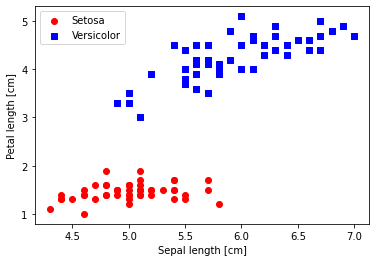

In [42]:
# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0,2]].values

plt.scatter(X[:50, 0], X[:50, 1], 
            color='red', marker='o', label='Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='s', label='Versicolor')

plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()

### Training Perceptron 
Below I train the perceptron implementation on the Iris dataset, and plot the misclassification error for each epoch.

/var/folders/9r/8_89__3s58gbpf7fxcf5xwb80000gn/T/ipykernel_93625/2186296914.py:55: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self.b_ = np.float(0.)


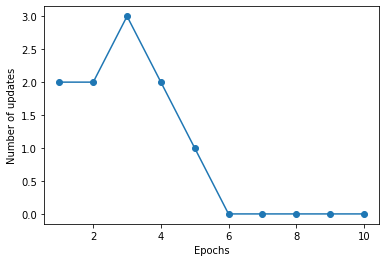

In [45]:
# initalize perceptron
ppn = Perceptron(eta=0.1, n_iter=10)

# train perceptron on Iris data
ppn.fit(X,y)
plt.plot(range(1, len(ppn.errors_) + 1),
        ppn.errors_, marker = 'o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

The function below first, defines a number of colors and markers and creates a colormap from the list of colors via *ListedColormap*. Then I determine the min and max values for the two features and use those feature vectors to create a pair of grid arrays (xx1 & xx2) via NumPy's *meshgrid()*. I do a little reshaping to the data since the perceptron classifier is trained on two feature dimensions, so I create a matric that has the same number of columns as the Iris training subset to be able to use the *predict* method. 

After reshaping the predicted class labels (*lab*), I draw a contour plot via Matplotlib's *contourf()*.

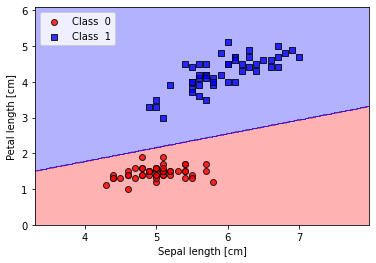

In [55]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    
    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # create vectors of min and max values for the two features
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    # use vectors to create grid arrays
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    # flatten grid array to matric that has the same number 
    # of columns as training subset
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class  {cl}',
                    edgecolor='black')
    
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()
    

# Implementating Adaline in Python
**Note** that the activation method has no effect on the code since it is simply an identity function.

In [58]:
class AdalineGD:
    """ADAptive LInear NEuron classifier.
    
    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.
    random_state : int
        Random number generator seed for random weight initialization.
        
    Attributes
    ------------
    w_ : 1d-array
        Weights after fitting.
    b_ : Scalar
        Bias unit after fitting.
    losses_ : list
        Mean squared error loss function values in each epoch.
    """
    
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    # Note that in the fit() weights and bias parameters are updated
    # by minimizing the losss function via gradient descent.
    def fit(self, X, y):
        """ Fit training data.
        Parameters
        ------------
        X : {array-like}, shape = [n_examples, n_features]
            Training vectors, where n_examples
            is the number of examples and 
            n_features is the number of features.
        
        y : array-like, shape = [n_examples]
            Target values.
            
        Returns
        ------------
        self : object
    
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        self.losses_ = []
        
        # loop over training dataset
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * 2.0 * errors.mean()
            
            # mean squared error
            loss = (errors**2).mean()
            self.losses_.append(loss)
        return self
            
        
    def net_input(self, X):
        """Compute net input"""
        # z = W^Tx + b
        return np.dot(X, self.w_) + self.b_
        
    def activation(self, X):
        """Compute linear activation"""
        return X
        
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X))>= 0.5, 1, 0)

Below I use to different learning rates (𝜂 = 0.1 and 𝜂 = 0.0001) respectively, to illustrate that the MSE becomes larger if you choose a learning rate that is too large (𝜂 = 0.1). A large learning rate (𝜂) *overshoot* the global minimum. The graph on the right-hand side illustrates that using a smaller learning rate too small (𝜂 = 0.0001) will take longer (larger number of ecpochs) to converage to the global loss minimum.

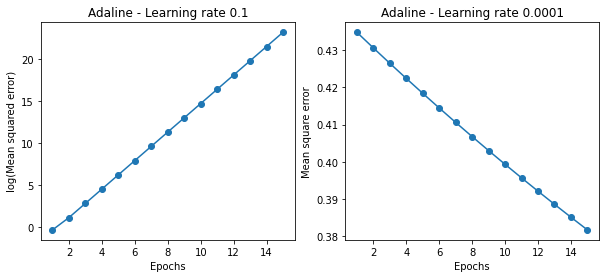

In [63]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(10,4))
ada1 = AdalineGD(n_iter = 15, eta = 0.1).fit(X, y)
ax[0].plot(range(1, len(ada1.losses_) + 1), 
           np.log10(ada1.losses_), marker = 'o')

ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Mean squared error)')
ax[0].set_title('Adaline - Learning rate 0.1')
ada2 = AdalineGD(n_iter=15, eta=0.0001).fit(X, y)

ax[1].plot(range(1, len(ada2.losses_) + 1),
           ada2.losses_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Mean square error')
ax[1].set_title('Adaline - Learning rate 0.0001')
plt.show()

## Feature Scaling: Standardization and improving gradient descent
Feature scaling is a set of method to help optimize ML models. In this case I will use a feature scaling method called **standardization**. Standardization is a normalization procedure that helps gradient descent learning to converge more quickly. 

Note: that standardization does not make the orginal dataset normally distributed. Standardization shifts the mean of each feature so that it is centered at zero and each feature has a standard deviation of 1 (unit variance).

Note: that MSE remains non-zero even though all flower examples were classified correctly.

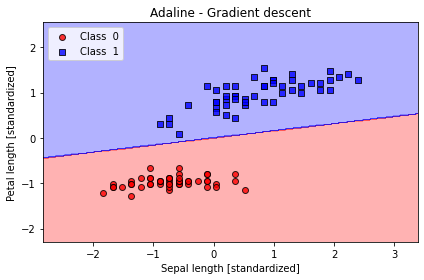

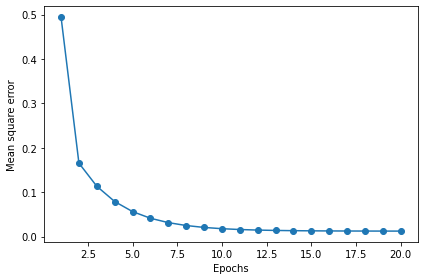

In [67]:
# Use mean() and std() to achive standardization
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

ada_gd = AdalineGD(n_iter=20, eta=0.5)
ada_gd.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada_gd)
plt.title('Adaline - Gradient descent')
plt.xlabel('Sepal length [standardized]')
plt.ylabel('Petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Show MSE v Epochs
plt.plot(range(1, len(ada_gd.losses_) + 1),
         ada_gd.losses_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Mean square error')
plt.tight_layout()
plt.show()

## Stochastic gradient descent
Full batch gradient descent can be costly when there are millions of data points involved since it need to reevaluate the whole training dataset each time we tak one step toward the global minium. The solution to this problem is stochastic gradient descent (SGD). 

In [73]:
class AdalineSGD:
    """ADAptive LInear NEuron classifier.
    
    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.
    shuffle : bool (default: True)
        Shuffles training data every epoch if True to prevent cycles.
    random_state : int
        Random number generator seed for random weight initialization.
        
    Attributes
    ------------
    w_ : 1d-array
        Weights after fitting.
    b_ : Scalar
        Bias unit after fitting.
    losses_ : list
        Mean squared error loss function values in each epoch.
    """
    
    def __init__(self, eta=0.01, n_iter=50, shuffle=True ,random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
        
    # Note that in the fit() weights and bias parameters are updated
    # by minimizing the losss function via gradient descent.
    def fit(self, X, y):
        """ Fit training data.
        Parameters
        ------------
        X : {array-like}, shape = [n_examples, n_features]
            Training vectors, where n_examples
            is the number of examples and 
            n_features is the number of features.
        
        y : array-like, shape = [n_examples]
            Target values.
            
        Returns
        ------------
        self : object
    
        """
        
        self._initialize_weights(X.shape[1])
        self.losses_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            losses = []
            for xi, target in zip(X, y):
                losses.append(self._update_weights(xi, target))
            avg_loss = np.mean(losses)
            self.losses_.append(avg_loss)
        return self
    
    def partial_fit(self, X, y):
        """Fit training data without reinitializing the weights"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X,y)
        return self
    
    
    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """Initalize weights to small random numbers"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=m)
        
        self.b_ = np.float_(0.)
        self.w_initialized = True
        

    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights""" 
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_ += self.eta * 2.0 * xi * (error)
        self.b_ += self.eta * 2.0 * error
        loss = error**2 
        return loss
        
    def net_input(self, X):
        """Compute net input"""
        # z = W^Tx + b
        return np.dot(X, self.w_) + self.b_
        
    def activation(self, X):
        """Compute linear activation"""
        return X
        
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X))>= 0.5, 1, 0)

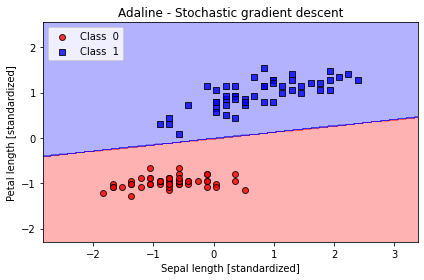

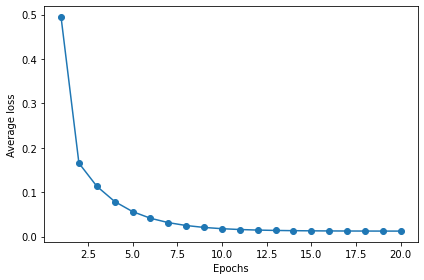

In [82]:
ada_sgd = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada_sgd.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada_sgd)
plt.title('Adaline - Stochastic gradient descent')
plt.xlabel('Sepal length [standardized]')
plt.ylabel('Petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Show MSE v Epochs
plt.plot(range(1, len(ada_gd.losses_) + 1),
         ada_gd.losses_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average loss')
plt.tight_layout()
plt.show()